# Map data to a normal distribution
This example demonstrates the use of the Box-Cox and Yeo-Johnson transforms through PowerTransformer to map data from various distributions to a normal distribution.
Below are examples of Box-Cox and Yeo-Johnwon applied to six different probability distributions: Lognormal, Chi-squared, Weibull, Gaussian, Uniform, and Bimodal.

Note that Box-Cox doesn't support negative inputs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer,QuantileTransformer

In [2]:
N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30

In [3]:
rng = np.random.RandomState(42)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')

qt = QuantileTransformer(
    n_quantiles=500, # 500 quntiles
    output_distribution='normal',
    random_state=rng
)
size = (N_SAMPLES,1)

In [19]:
# ORIGINAL DATA
# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)

In [6]:
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

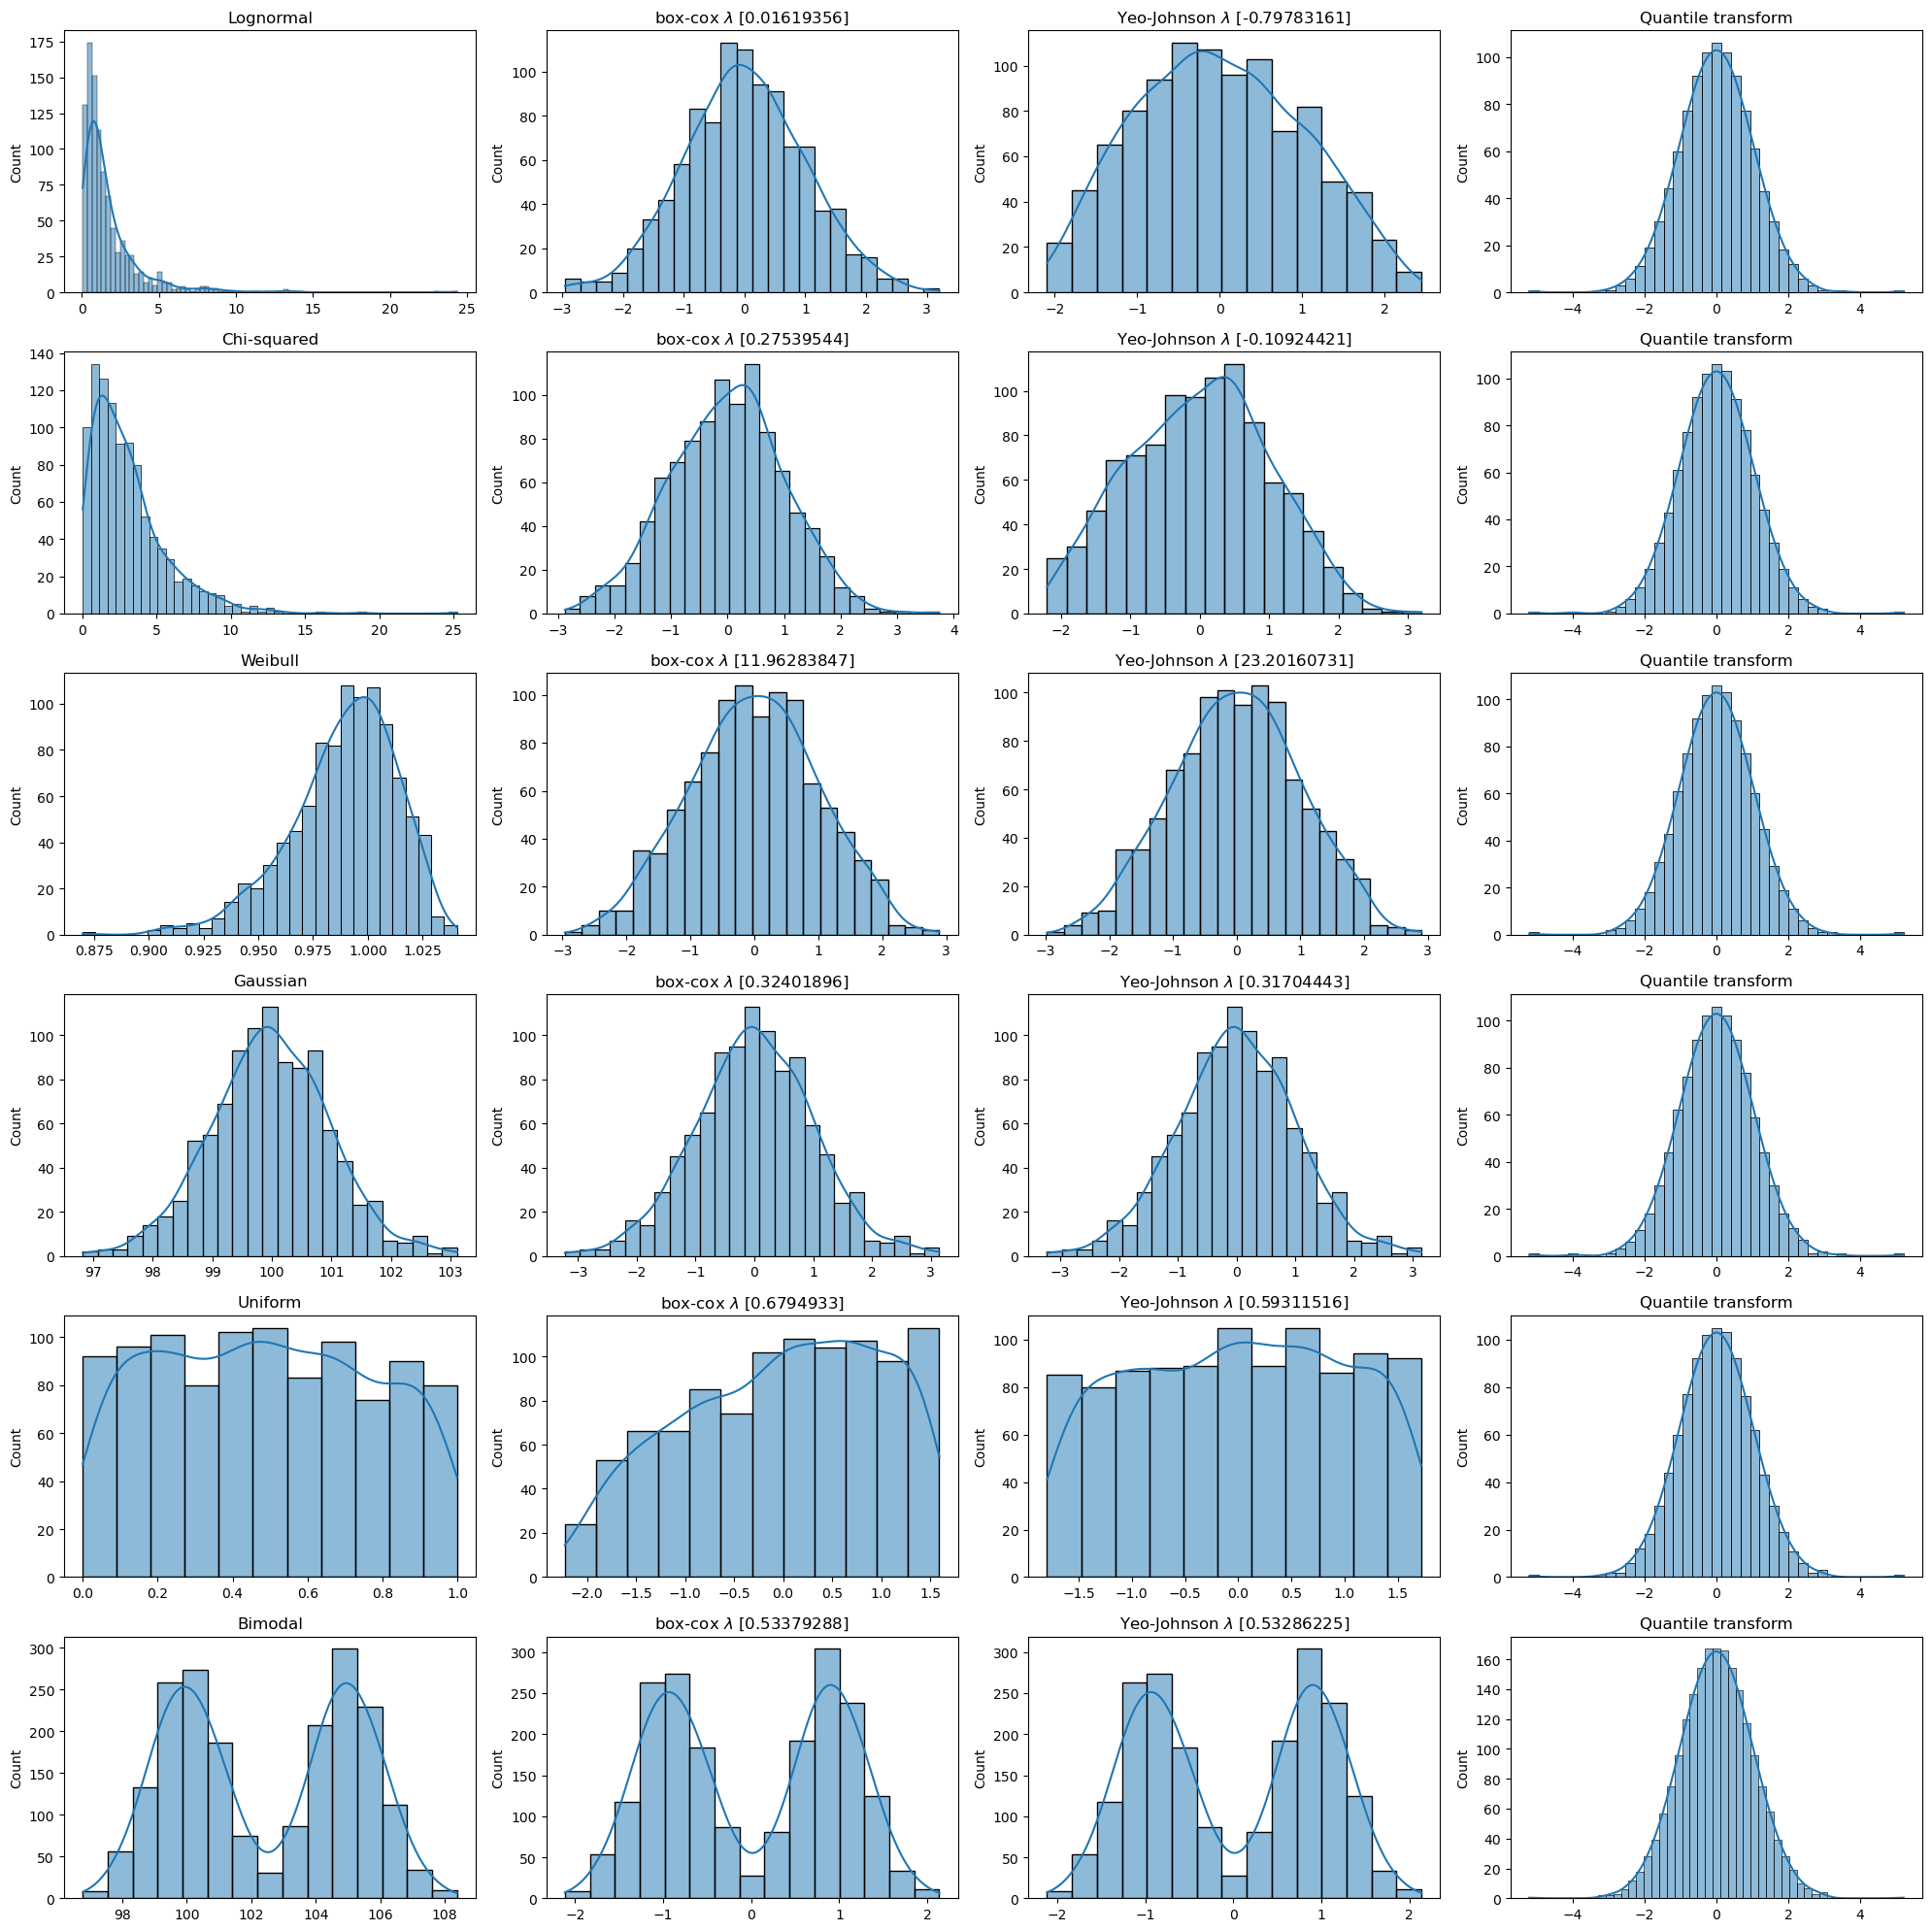

In [33]:
import seaborn as sns
fig, axes = plt.subplots(6,4, figsize = (20,20))

for distribution,axes_row in zip(distributions, axes):
    name,X = distribution
    X_trans_bc = bc.fit_transform(X)
    X_trans_yj = yj.fit_transform(X)
    X_trans_qt = qt.fit_transform(X)

    cols = [
        (name, X, None),
        ('box-cox',X_trans_bc, bc.lambdas_),
        ('Yeo-Johnson',X_trans_yj, yj.lambdas_),
        ('Quantile transform',X_trans_qt,None),
    ]
    
    for ax,col in zip(axes_row, cols):
        sns.histplot(col[1],ax=ax,kde=True,legend=False)
        if col[2] is None:
            ax.set_title(col[0])
        else:
            ax.set_title(f"{col[0]} $\\lambda$ {col[2]}")
fig.tight_layout()

`Transformer.lambda_` :❓
